# K-Means Clustering

## The Algorithm - K-Means Clustering (Vanilla Version)


- Randomly choose `K`-datapoints from the Object Space $X_i \in {X_1, X_2, \dots, X_n}$
- $\mu_j \in {\mu_1, \mu_2, \dots, \mu_k}$ are the centroids
- *Cluster Assignment*
    - Iterate over $X_i$
        - Calculate the euclidean distance between $x_i$ and $\mu_j$
        - Assign the cluster to that centroid with the minimum euclidean distance
    
- Begin *Optimization Loop* until convergence (unchanged cluster centroids) or termination condition (max iteration number):
    - Claculate the new centroid $\mu_j$,  by taking the mean of the values $x_i$ assigned to $\mu_j$
    - Perform the Cluster Assignment Loop as shown above
    - Check termination condition or convergence criterion
        - break if satisfied else continue

In [1]:
import numpy as np
import random
from collections import defaultdict
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

seed = 518123

random.seed(seed)
np.random.seed(seed)

### Generating a set of data points using `scikit-learn`'s, `make_blobs` method, using a specific seed for replication purpose.

In [2]:
max_data_points = 500
num_clusters = 5
num_features = 2
features, labels = make_blobs(n_samples=max_data_points, n_features=num_features, centers=num_clusters, cluster_std=1, random_state=seed)

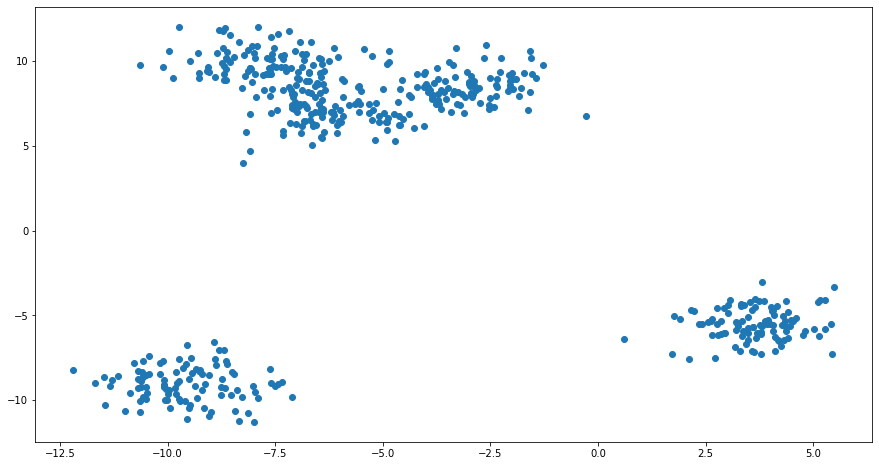

In [3]:
plt.figure(figsize=(15, 8))
plt.scatter(features[:,0], features[:, 1]);

## Euclidean Distance
The Euclidean Distance or Frobenius Norm or the $L_2$-norm is calculated using the below equation:
$$
\begin{align}
distance(v1, v2) & = \sqrt{(x2 − x1)^2 + (y2 − y1)^2} & \dots \text{Square Root of the sum of squared differences}&
\end{align}
$$

In [4]:
def euclidean_ditance(x, y):
    """
    distance(v1, v2) = sqrt[(x2 − x1)^2 + (y2 − y1)^2]
    """
    squared_diff = (x - y)**2
    l2_norm = np.sqrt(squared_diff.sum())
    return l2_norm

In [5]:
x, y = features[0], features[5]

np.linalg.norm(x - y), euclidean_ditance(x, y)

(1.7050212235131188, 1.7050212235131188)

In [6]:
def k_means_clustering(X, k_clusters:int = 2, max_iter=500):

    assert k_clusters >= 2
    
    # Randomly choose centroids from the feature space
    # Restting the seed here
    np.random.seed()
    centroids = np.random.randint(0, len(X), k_clusters)
    # Keep track of the centroids
    centroids = {f"mu_{c}": X[centroids[c]] for c in range(k_clusters)}
        
    while max_iter > 0:
        max_iter -= 1
        
        # Maintain a mapping for data-point to cluster mapping
        # Caution: This has to be re-initialized at each iteration,
        # otherwise historical cluster assignments will not be over-written
        row_cluster_mapping = defaultdict(list)
        
        # Iterate over each data-point
        for row in range(len(X)):

            euclidean_distances = []
            # Calculate Euclidean Distance between a data-point and each centroids
            for k, v in centroids.items():
                euclidean_distances.append(np.linalg.norm(X[row] - centroids[k]))

            # Get the closest centroid
            # The closest centroid will be the one which has the minimum Euclidean Distance
            closest_centroid = np.argmin(euclidean_distances)

            # Update the row to a cluster-mapping
            row_cluster_mapping[closest_centroid].append(row)

        # Keep a copy of the old centroids to compare with the updated centroids
        old_centroids = deepcopy(centroids)
        # Iterate over the row-cluster mapping where each key is a cluster id
        for k, v in row_cluster_mapping.items():
            # Calculate the centroid value by taking the mean over each cluster points
            # np.array(v)[:,0].sum()/len(v), np.array(v)[:,1].sum()/len(v) ==> np.mean(v, axis=0)
            centroids[f'mu_{k}'] = np.sum(X[v], axis=0)/len(v)
        
        if (np.array(list(old_centroids.values())) == np.array(list(centroids.values()))).all():
            print('Converged !!!')
            break
        
    print('Clustering Accomplished ...')
    cluster_assignments = np.ones(len(X))
    for cluster, indices in row_cluster_mapping.items():
        cluster_assignments[indices] *= cluster
    return centroids, row_cluster_mapping, cluster_assignments

In [7]:
centroids, cluster_indices_map, cluster_assignments = k_means_clustering(features, k_clusters=num_clusters)

Converged !!!
Clustering Accomplished ...


## Analysis

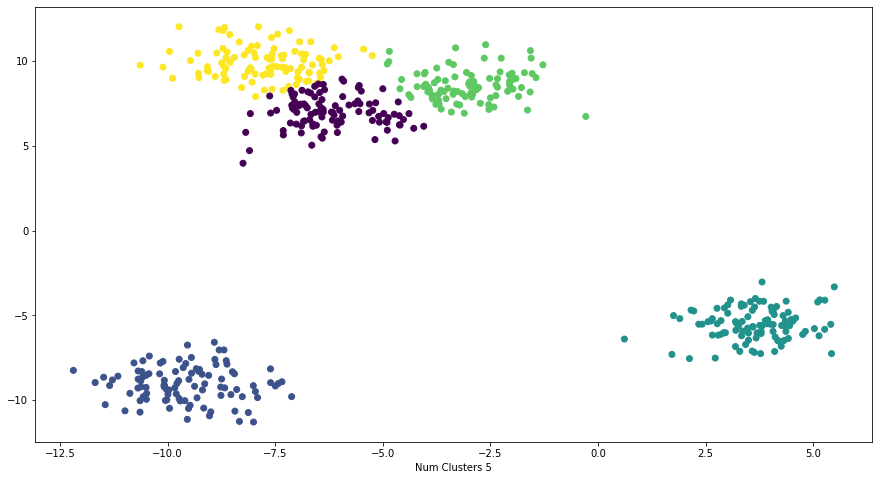

In [8]:
plt.figure(figsize=(15, 8))
plt.scatter(features[:,0], features[:,1], c=cluster_assignments);
plt.xlabel(f'Num Clusters {num_clusters}');

Converged !!!
Clustering Accomplished ...


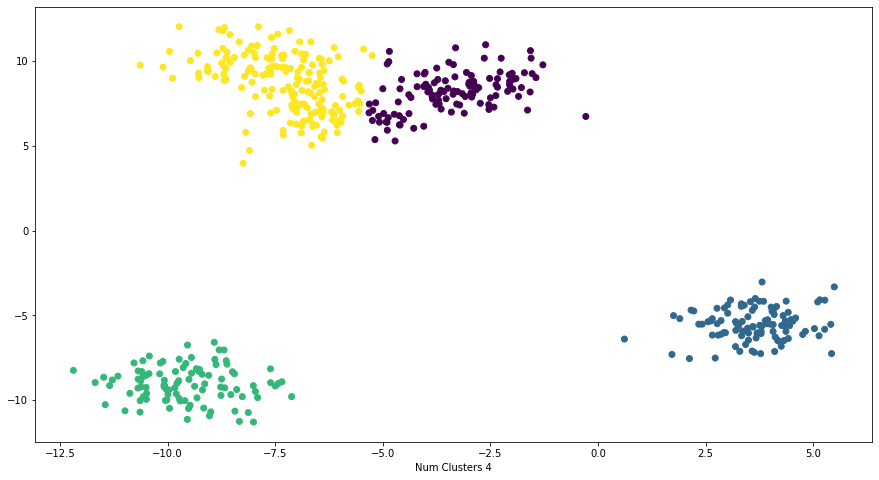

In [9]:
num_clusters = 4
_, _, cluster_assignments = k_means_clustering(features, k_clusters=num_clusters)
plt.figure(figsize=(15, 8))
plt.scatter(features[:,0], features[:,1], c=cluster_assignments);
plt.xlabel(f'Num Clusters {num_clusters}');

Converged !!!
Clustering Accomplished ...


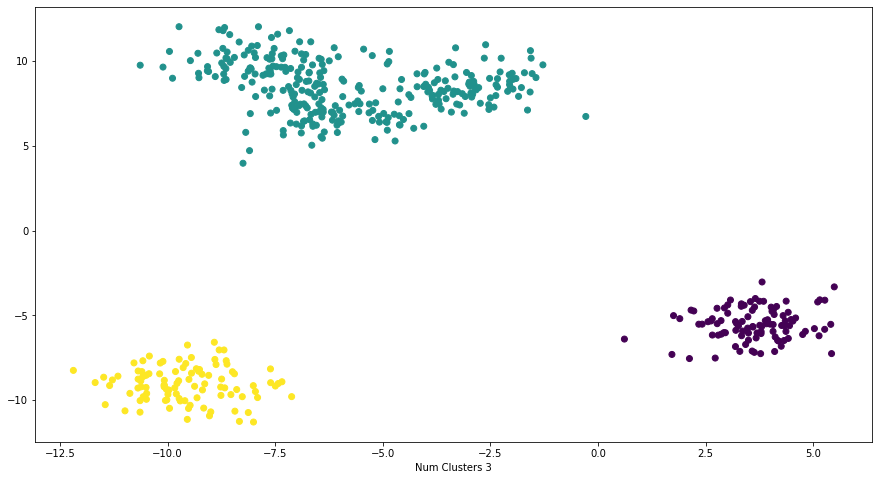

In [10]:
num_clusters = 3
_, _, cluster_assignments = k_means_clustering(features, k_clusters=num_clusters)
plt.figure(figsize=(15, 8))
plt.scatter(features[:,0], features[:,1], c=cluster_assignments);
plt.xlabel(f'Num Clusters {num_clusters}');